# Assignment 4

**Martin, Erik : 250660**  
**Seim, Håvard : 260699**  
**Group: L**  

In [65]:
import numpy as np
from scipy.optimize import linprog
import networkx as nx

## Task 1

In this scenario we want to maximize the profit from producing product X and product Y, with limited use time for the machine and craftsmen. 

Variables:

$x$ = number of units of product X produced in a week. <br>
$y$ = number of units of product Y produced in a week.

Objective function:

The function will be the revenue of each product subtracted by the machine and craftsman costs of each product which amounts to: <br>
$$Max\ \frac{505}{3}x + \frac{770}{3}y $$
Constraints:
$$c_1: \frac{15}{60}x + \frac{20}{60}y \leq 40$$
$$c_2: \frac{20}{60}x + \frac{30}{60}y \leq 35$$
$$c_3: x \geq 10$$
$$c_4: y \geq 0$$

Sources used:
* [linprog()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)
* Chapter 29 in "Introduction to algorithms"
* Lecture slides: https://stavanger.instructure.com/courses/13723/files/1677276?module_item_id=330748

In [66]:
x = {
    "machine_time": 15,
    "craftsman_time": 20,
    "revenue": 200,
    "machine_cost": 15 / 60 * 100,
    "craftsman_cost": 20 / 60 * 20,
    "constraint_units": 10,
}

y = {
    "machine_time": 20,
    "craftsman_time": 30,
    "revenue": 300,
    "machine_cost": 20 / 60 * 100,
    "craftsman_cost": 30 / 60 * 20,
    "constraint_units": 0,
}

machine_time_constraint = 40
craftsman_time_constraint = 35

c = [
    -(x["revenue"] - (x["machine_cost"] + x["craftsman_cost"])),
    -(y["revenue"] - (y["machine_cost"] + y["craftsman_cost"])),
]

bounds = [(x["constraint_units"], None), (y["constraint_units"], None)]
A_ub = [
    [x["machine_time"] / 60, y["machine_time"] / 60],
    [x["craftsman_time"] / 60, y["craftsman_time"] / 60],
]
b_ub = [machine_time_constraint, craftsman_time_constraint]


result = linprog(c, bounds=bounds, A_ub=A_ub, b_ub=b_ub)
result.x = [round(i) for i in result.x]
print(f"Total weekly profit: {-round(result.fun, 2)}\n{result.x[0]} units produced of product x,\n{result.x[1]} units produced of product y")

Total weekly profit: 17938.89
10 units produced of product x,
63 units produced of product y


## Task 2

### a)

In this scenario we want to find the bottleneck network cut of the network below.
The bottleneck network cut or minimum cut is the cut that splits the network graph such the source is disconnected from the sink, and the capacity is the smallest. This is calculated by finding the smallest capacity of a cut in the network.

$$c(S,T)=\sum_{u \in S, v \in T} c(u,v)$$

This basically means that the sum of the capacities out of the cut is the capacity.

There are two possible cuts in this network, that only contain two edges. 
The first cut:
* [s] and [v1, v2, v3, v4, v5, t] = 14 + 25 = 39

The second cut:
* [s, v1, v2, v3, v4, v5] and [t] = 10 + 20 = 30.

So the bottleneck network cut is the second cut which has a capacity of 30.

Sources used:
* [minimum cut](https://stavanger.instructure.com/courses/13723/files/1660955?module_item_id=327828)
* [networkx minimum_cut()](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.minimum_cut.html)


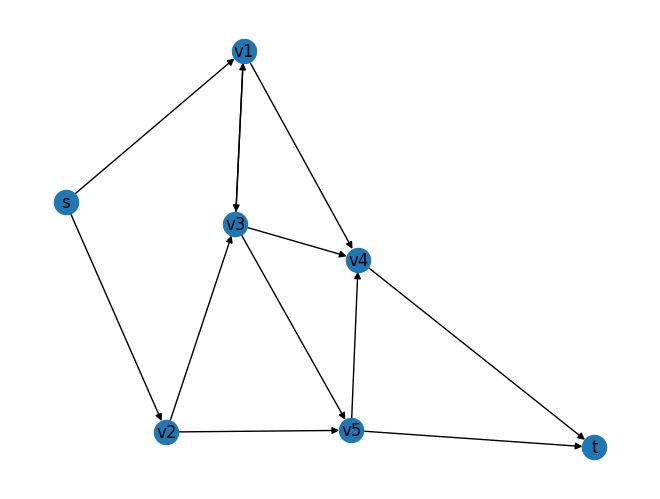

In [67]:
G = nx.DiGraph()

G.add_edge("s", "v1", capacity=14)
G.add_edge("s", "v2", capacity=25)
G.add_edge("v1", "v3", capacity=3)
G.add_edge("v3", "v1", capacity=6)
G.add_edge("v1", "v4", capacity=21)
G.add_edge("v2", "v3", capacity=13)
G.add_edge("v2", "v5", capacity=7)
G.add_edge("v3", "v4", capacity=10)
G.add_edge("v3", "v5", capacity=15)
G.add_edge("v4", "t", capacity=20)
G.add_edge("v5", "v4", capacity=5)
G.add_edge("v5", "t", capacity=10)

nx.draw(G, with_labels=True)

In [68]:
value, cut = nx.minimum_cut(G, "s", "t")

print(f"The value of the bottleneck network cut is: {value}")
print(f"The bottleneck network cut is: \n\tcut A: {cut[0]}\nand\n\tcut B: {cut[1]}")

The value of the bottleneck network cut is: 30
The bottleneck network cut is: 
	cut A: {'v4', 'v1', 's', 'v2', 'v5', 'v3'}
and
	cut B: {'t'}


### b)

The problem of finding the maximum flow of a graph $G$ can be found through linear programming, by maximizing the edges that enter the sink $t$, given the constraints of flow conservation for each vertex. 

Variables:

$x_{ij}$ = flow through edge from vertex $i$ to vertex $j$ for all edges in $G$

Objective function:

Maxmimize sum of flow of all edges that are directed towards the sink $t$
$$Max\ \sum_{i} x_{it}$$

constraints:
$$ x_{s1} + x_{31} - x_{14} - x_{13} = 0$$
$$ x_{s2} - x_{25} - x_{23} = 0$$
$$ x_{13} + x_{23} + x_{43} - x_{31} - x_{35} = 0$$
$$ x_{14} + x_{54} - x_{43} - x_{4t} = 0$$
$$ x_{25} + x_{35} - x_{54} - x_{5t} = 0$$
$$ 0 \leq x_{ij} \leq c_{ij}$$

Sources used:
* Lecture notes: https://stavanger.instructure.com/courses/13723/files/1677277?module_item_id=330749

In [69]:
import re

vs = {
    "v1": "+xs1+x31-x14-x13",
    "v2": "+xs2-x25-x23",
    "v3": "+x13+x23+x43-x31-x35",
    "v4": "+x14+x54-x43-x4t",
    "v5": "+x25+x35-x54-x5t",
}

es = {
    "xs1": 14,
    "xs2": 25,
    "x13": 3,
    "x14": 21,
    "x23": 13,
    "x25": 7,
    "x31": 6,
    "x35": 15,
    "x43": 10,
    "x4t": 20,
    "x54": 5,
    "x5t": 10,

}

def get_edges(vs: dict):
    edges = {}
    
    for e in list(es.keys()):
        edges[e] = []
        for v in vs.values():
            search = re.search(e, v)
            if search:
                if v[search.start()-1] == "+":
                    edges[e].append(1)
                else:
                    edges[e].append(-1)
            else:
                edges[e].append(0)
    return edges

get_edges(vs)

c2 = [0]*len(es)
c2[9]= c2[11]= -1
bounds2 = [(0, e) for e in list(es.values())]
A_eq = np.array([v for v in get_edges(vs).values()]).T
b_eq = [0]*5

x = linprog(c2, bounds=bounds2, A_eq=A_eq, b_eq=b_eq)
x.x = [round(i) for i in x.x]

print(f"Maximum flow: {-round(x.fun, 2)}\n The flow through all edges are: {x.x}")

Maximum flow: 30.0
 The flow through all edges are: [14, 16, 0, 20, 9, 7, 6, 3, 0, 20, 0, 10]
